### Customer Churn Analysis and prediction

## Task 1  Data cleaning and preprocessing

In [11]:
#import data
import pandas as pd
import numpy as np
df=pd.read_csv('Telco_Customer_Churn_Dataset .csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
#handling missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
# Check missing values again after conversion
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [19]:
# Fill numerical missing values (TotalCharges) with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [21]:
# Drop 'customerID' as it is not useful for prediction
df = df.drop('customerID', axis=1)

In [23]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [25]:
# Apply One-Hot Encoding (drop_first=True to avoid dummy variable trap)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [27]:
# Ensure all columns are numeric now
print(df.dtypes)

# View cleaned dataset shape
print("Dataset shape after preprocessing:", df.shape)

# Preview cleaned data
df.head()

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## Task 2   Exploratory Data Analysis (EDA)

#### Calculate and visualize the overall churn rate

Overall Churn Rate: 26.54%


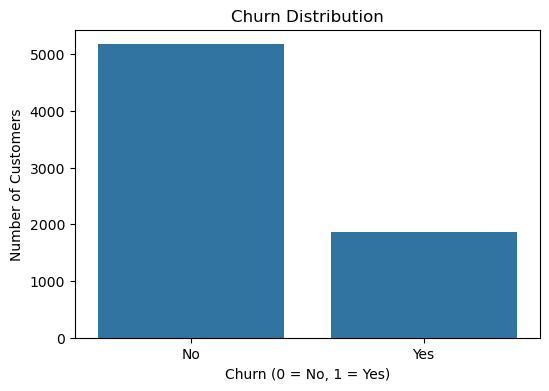

In [33]:
# Calculate churn rate
churn_rate = df['Churn_Yes'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Visualize churn rate
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Yes', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

###  Explore customer distribution by various demographics

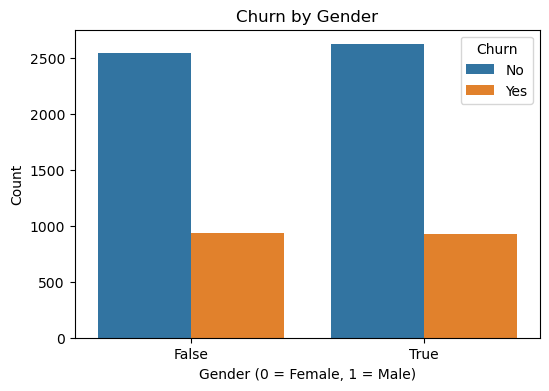

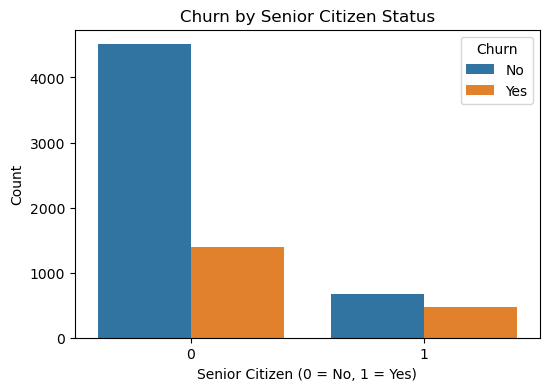

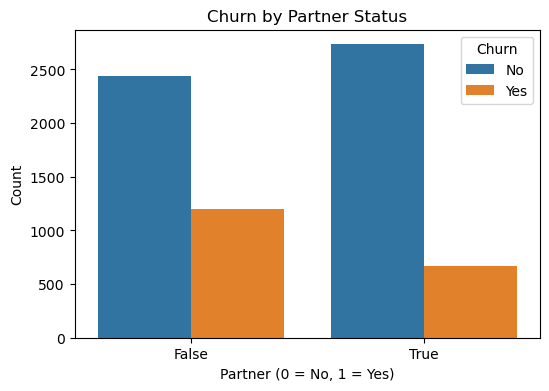

In [36]:
# 1  Plot churn by gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender_Male', hue='Churn_Yes', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# 2  Plot churn by Senior Citizen status
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn_Yes', data=df)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# 3  Plot churn by Partner status
plt.figure(figsize=(6,4))
sns.countplot(x='Partner_Yes', hue='Churn_Yes', data=df)
plt.title('Churn by Partner Status')
plt.xlabel('Partner (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


### Analyze tenure distribution

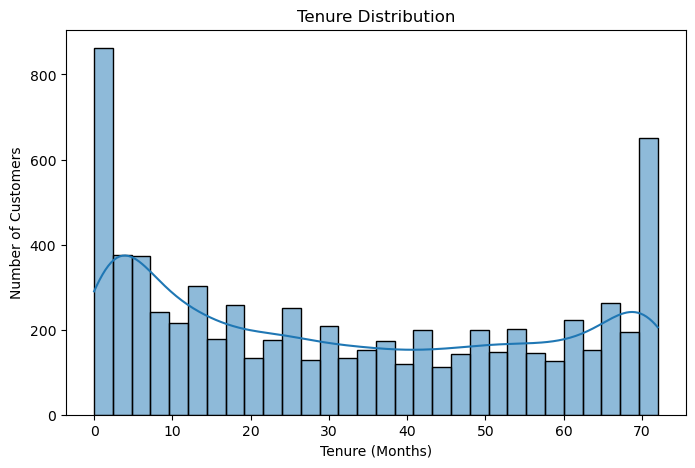

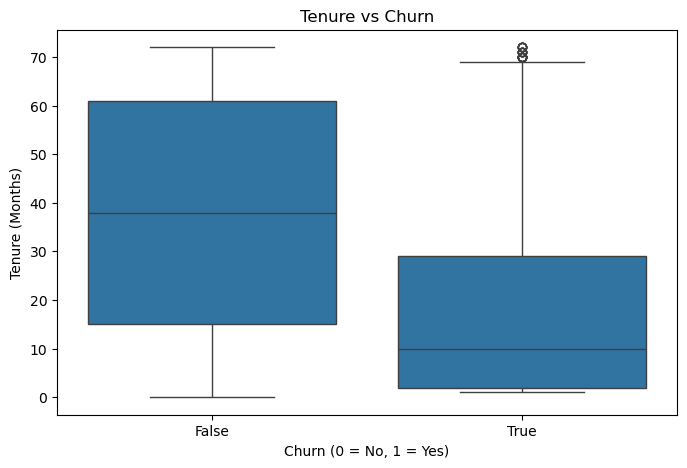

In [39]:
# Tenure distribution
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

# Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn_Yes', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Months)')
plt.show()


### Investigate relationships between churn and different contract types/payment methods.

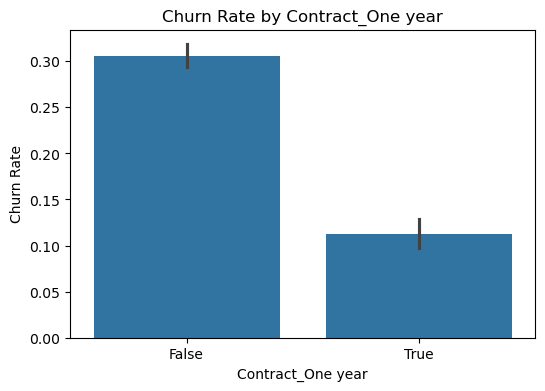

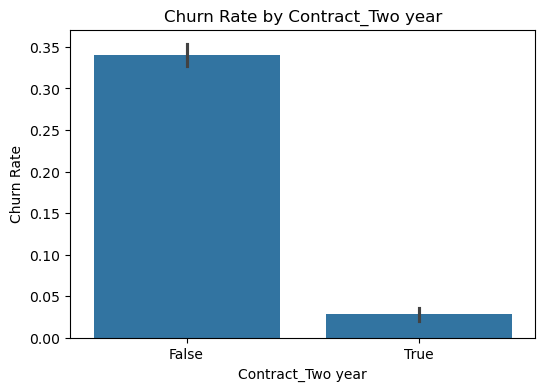

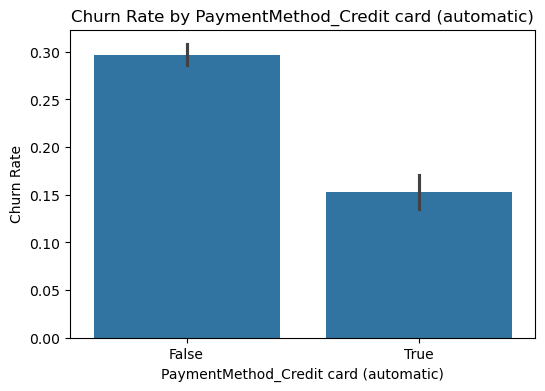

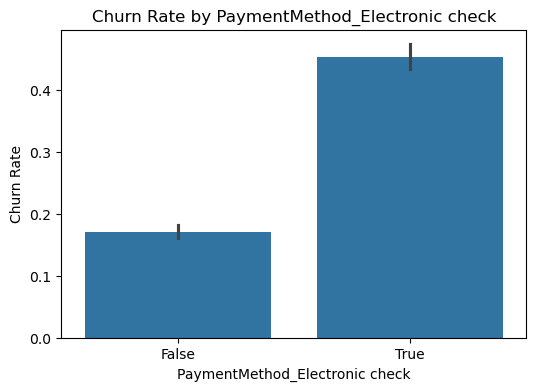

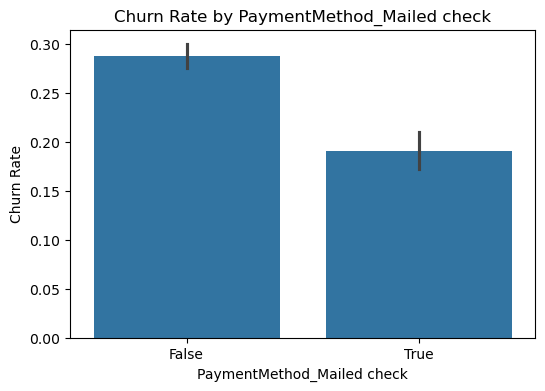

In [42]:
# Churn by Contract Type
contract_cols = [col for col in df.columns if 'Contract_' in col]

for col in contract_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn_Yes', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.show()

# Churn by Payment Method
payment_cols = [col for col in df.columns if 'PaymentMethod_' in col]

for col in payment_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn_Yes', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.show()


## Tasks 3: Customer Segmentation

### Segment customers based on tenure,monthly charges, and contract type

In [46]:
# Create tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

# Check the new column
df['TenureGroup'].value_counts()

TenureGroup
0-1 year     2186
2-4 years    1594
5+ years     1407
1-2 years    1024
4-5 years     832
Name: count, dtype: int64

In [48]:
# Create Monthly Charges bins
df['MonthlyChargeGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 120],
                                  labels=['Low', 'Medium', 'High'])
# Check the new column
df['MonthlyChargeGroup'].value_counts()

MonthlyChargeGroup
High      3583
Low       1735
Medium    1725
Name: count, dtype: int64

### Analyze churn rates across these segments

In [51]:
# Churn rate by Tenure Group
tenure_churn = df.groupby('TenureGroup')['Churn_Yes'].mean() * 100
print("Churn Rate by Tenure Group:")
print(tenure_churn)

# Churn rate by Monthly Charge Group
monthlycharge_churn = df.groupby('MonthlyChargeGroup')['Churn_Yes'].mean() * 100
print("\nChurn Rate by Monthly Charge Group:")
print(monthlycharge_churn)

# Churn rate by Contract Type
contract_cols = [col for col in df.columns if 'Contract_' in col]

for col in contract_cols:
    rate = df.groupby(col)['Churn_Yes'].mean() * 100
    print(f"\nChurn Rate by {col}:")
    print(rate)

Churn Rate by Tenure Group:
TenureGroup
0-1 year     47.438243
1-2 years    28.710938
2-4 years    20.388959
4-5 years    14.423077
5+ years      6.609808
Name: Churn_Yes, dtype: float64

Churn Rate by Monthly Charge Group:
MonthlyChargeGroup
Low       10.893372
Medium    23.942029
High      35.361429
Name: Churn_Yes, dtype: float64

Churn Rate by Contract_One year:
Contract_One year
False    30.574506
True     11.269518
Name: Churn_Yes, dtype: float64

Churn Rate by Contract_Two year:
Contract_Two year
False    34.050112
True      2.831858
Name: Churn_Yes, dtype: float64


C:\Users\Samsung\AppData\Local\Temp\ipykernel_6376\1812761481.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthlycharge_churn = df.groupby('MonthlyChargeGroup')['Churn_Yes'].mean() * 100


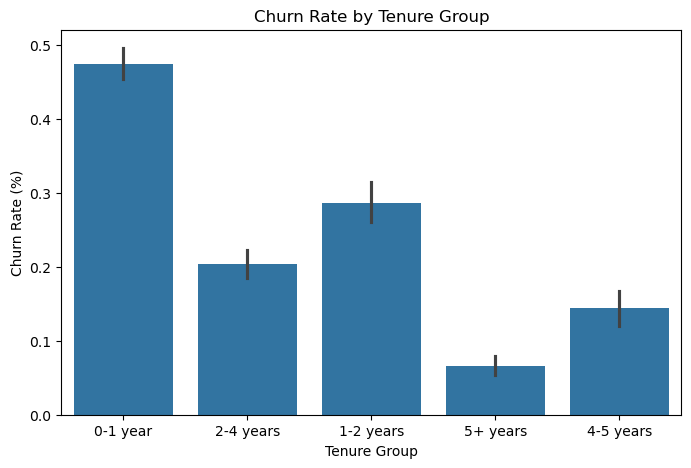

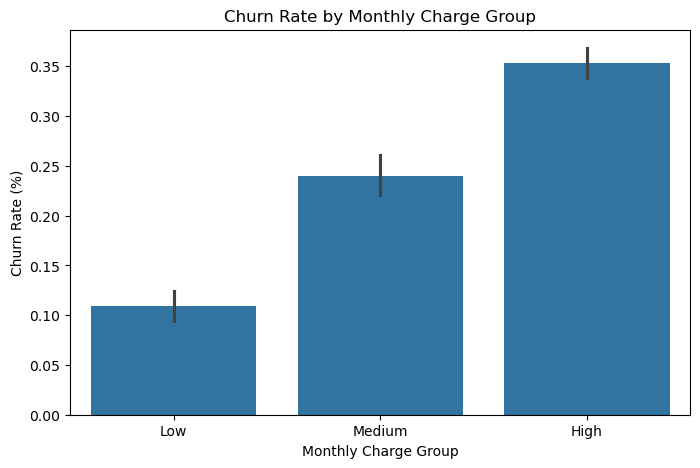

In [53]:
# Tenure Group vs Churn
plt.figure(figsize=(8,5))
sns.barplot(x='TenureGroup', y='Churn_Yes', data=df)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.show()

# Monthly Charge Group vs Churn
plt.figure(figsize=(8,5))
sns.barplot(x='MonthlyChargeGroup', y='Churn_Yes', data=df)
plt.title('Churn Rate by Monthly Charge Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Monthly Charge Group')
plt.show()


## Task 5  Customer Retention Strategies

### Propose data-driven strategies to reduce churn

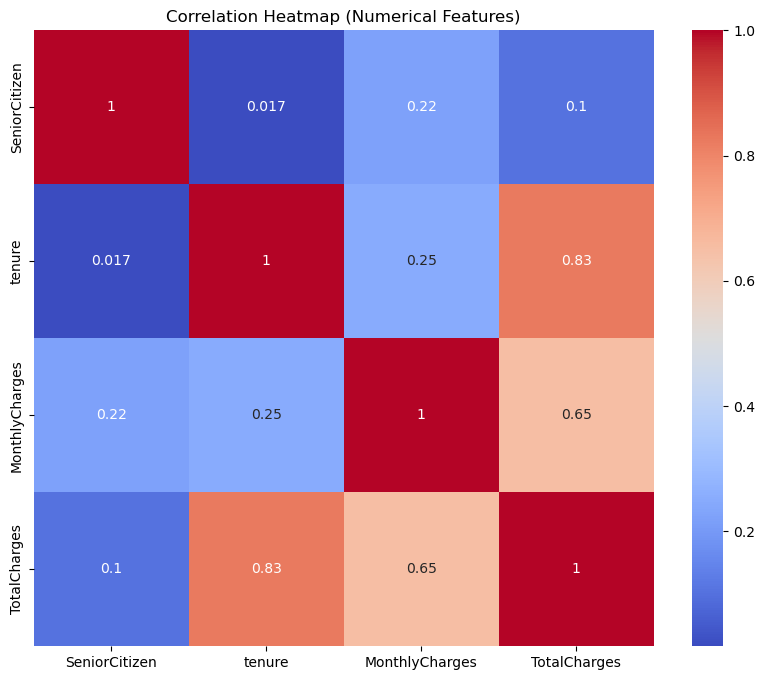

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

In [87]:
# Contract type vs Churn
print(df.groupby('Contract_One year')['Churn_Yes'].mean())
print(df.groupby('Contract_Two year')['Churn_Yes'].mean())

# For PaymentMethod, if it's one-hot encoded
print(df.groupby('PaymentMethod_Credit card (automatic)')['Churn_Yes'].mean())
print(df.groupby('PaymentMethod_Electronic check')['Churn_Yes'].mean())
print(df.groupby('PaymentMethod_Mailed check')['Churn_Yes'].mean())

payment_methods = ['PaymentMethod_Credit card (automatic)', 
                   'PaymentMethod_Electronic check', 
                   'PaymentMethod_Mailed check']

for method in payment_methods:
    print(f"{method}: {df.groupby(method)['Churn_Yes'].mean()}")

internet_services = ['InternetService_Fiber optic', 'InternetService_No']

for service in internet_services:
    print(f"{service}: {df.groupby(service)['Churn_Yes'].mean()}")


Contract_One year
False    0.305745
True     0.112695
Name: Churn_Yes, dtype: float64
Contract_Two year
False    0.340501
True     0.028319
Name: Churn_Yes, dtype: float64
PaymentMethod_Credit card (automatic)
False    0.296504
True     0.152431
Name: Churn_Yes, dtype: float64
PaymentMethod_Electronic check
False    0.170586
True     0.452854
Name: Churn_Yes, dtype: float64
PaymentMethod_Mailed check
False    0.287424
True     0.191067
Name: Churn_Yes, dtype: float64
PaymentMethod_Credit card (automatic): PaymentMethod_Credit card (automatic)
False    0.296504
True     0.152431
Name: Churn_Yes, dtype: float64
PaymentMethod_Electronic check: PaymentMethod_Electronic check
False    0.170586
True     0.452854
Name: Churn_Yes, dtype: float64
PaymentMethod_Mailed check: PaymentMethod_Mailed check
False    0.287424
True     0.191067
Name: Churn_Yes, dtype: float64
InternetService_Fiber optic: InternetService_Fiber optic
False    0.144920
True     0.418928
Name: Churn_Yes, dtype: float64
Inte

In [98]:
# LTV calculation
df['LTV'] = df['MonthlyCharges'] * df['tenure']
df['customerID'] = df.index
# Check top 10 high LTV customers who churned
high_value_churners = df[df['Churn_Yes'] == 1].sort_values(by='LTV', ascending=False)
print(high_value_churners[['customerID', 'LTV', 'MonthlyCharges', 'tenure']].head(10))


      customerID      LTV  MonthlyCharges  tenure
4610        4610  8481.60          117.80      72
6537        6537  8095.50          115.65      70
1306        1306  8088.50          115.55      70
6038        6038  7994.00          114.20      70
5127        5127  7929.45          118.35      67
3890        3890  7866.00          109.25      72
6289        6289  7785.40          116.20      67
3040        3040  7710.60          108.60      71
5581        5581  7694.20          113.15      68
975          975  7671.55          108.05      71


## Task 6 visualizations

### Create various visualizations for deeper insights (e.g., box plots, violin plots, pair plots).

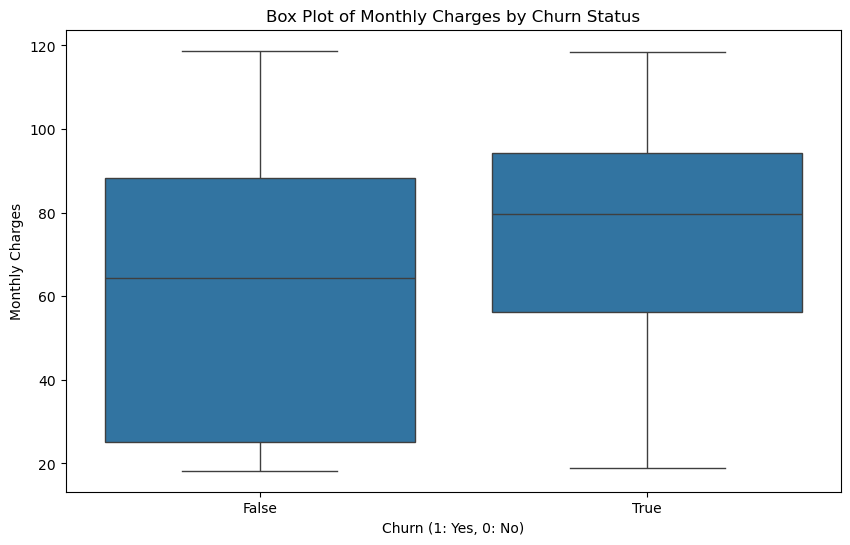

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to compare MonthlyCharges for churned vs. non-churned customers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn_Yes', y='MonthlyCharges')
plt.title('Box Plot of Monthly Charges by Churn Status')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Monthly Charges')
plt.show()

In [126]:
# Violin plot

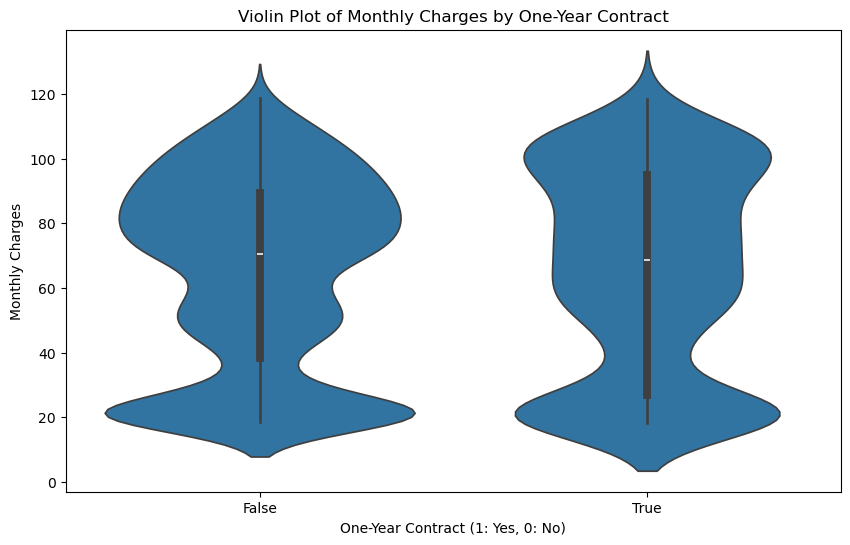

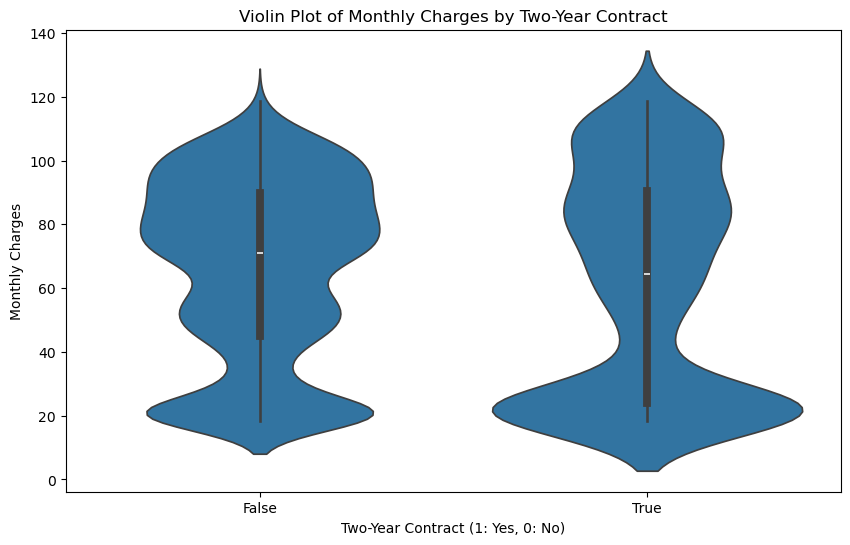

In [116]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Contract_One year', y='MonthlyCharges')
plt.title('Violin Plot of Monthly Charges by One-Year Contract')
plt.xlabel('One-Year Contract (1: Yes, 0: No)')
plt.ylabel('Monthly Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Contract_Two year', y='MonthlyCharges')
plt.title('Violin Plot of Monthly Charges by Two-Year Contract')
plt.xlabel('Two-Year Contract (1: Yes, 0: No)')
plt.ylabel('Monthly Charges')
plt.show()


In [128]:
# pairplot

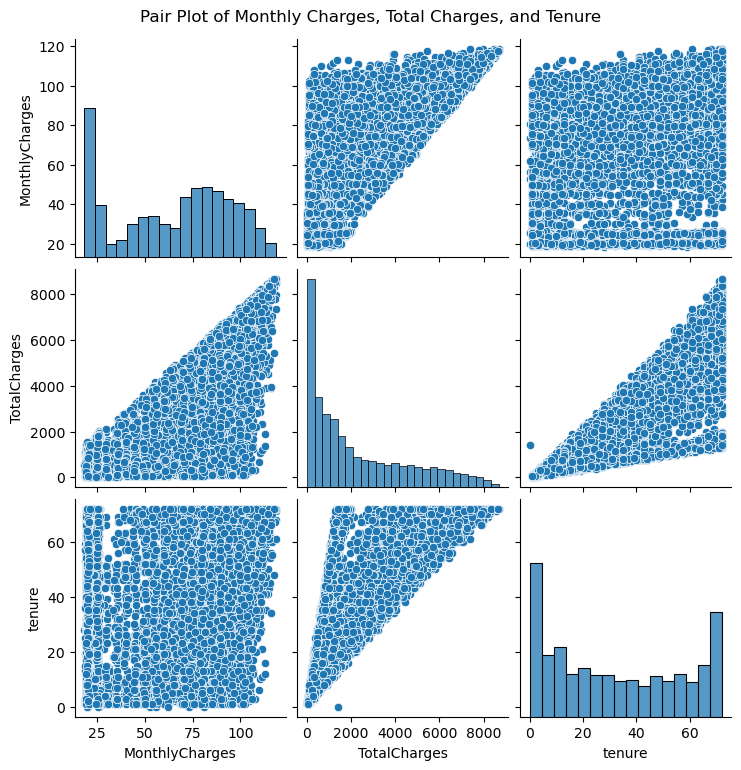

In [118]:
# Select a subset of numerical features for pair plot
subset = df[['MonthlyCharges', 'TotalCharges', 'tenure']]

# Pair plot to see relationships between these features
sns.pairplot(subset)
plt.suptitle('Pair Plot of Monthly Charges, Total Charges, and Tenure', y=1.02)
plt.show()

In [130]:
# heat map

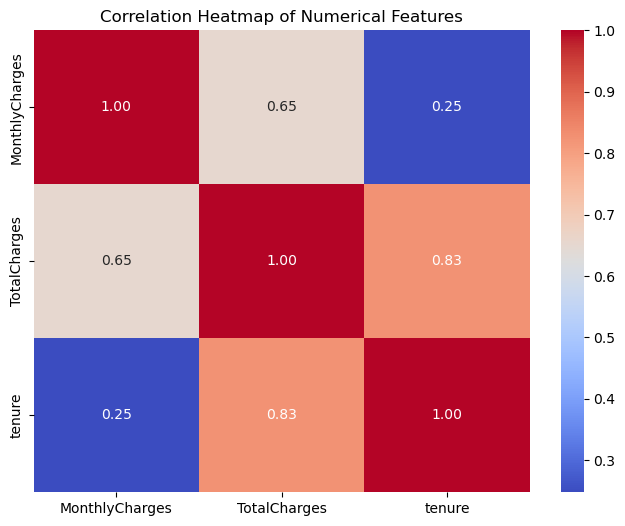

In [120]:
# Compute correlation matrix
correlation_matrix = df[['MonthlyCharges', 'TotalCharges', 'tenure']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [132]:
# count plot

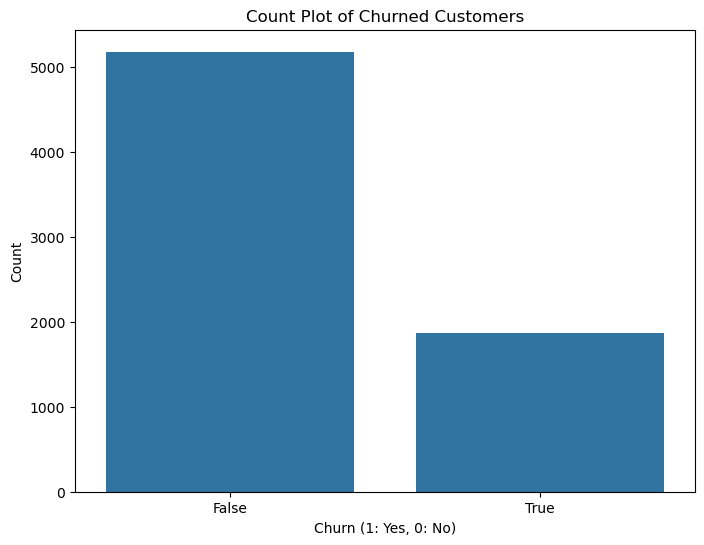

In [122]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn_Yes')
plt.title('Count Plot of Churned Customers')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [134]:
# bar plot

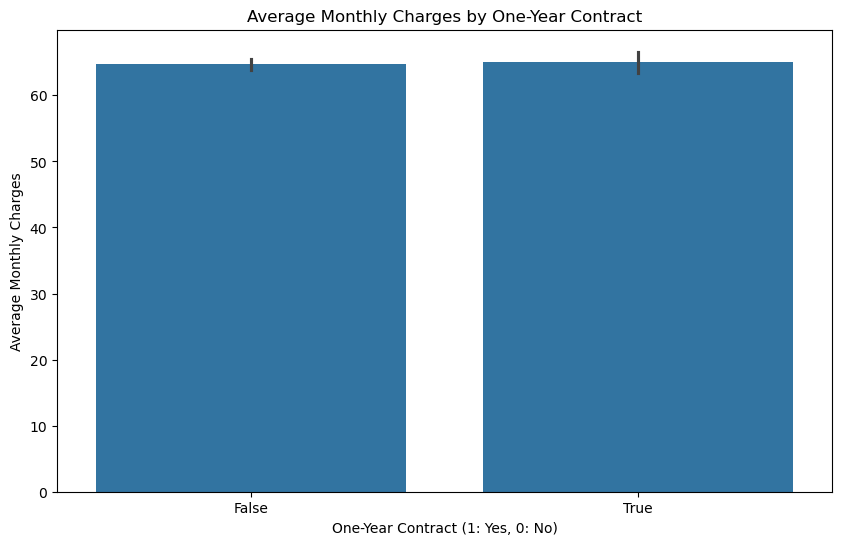

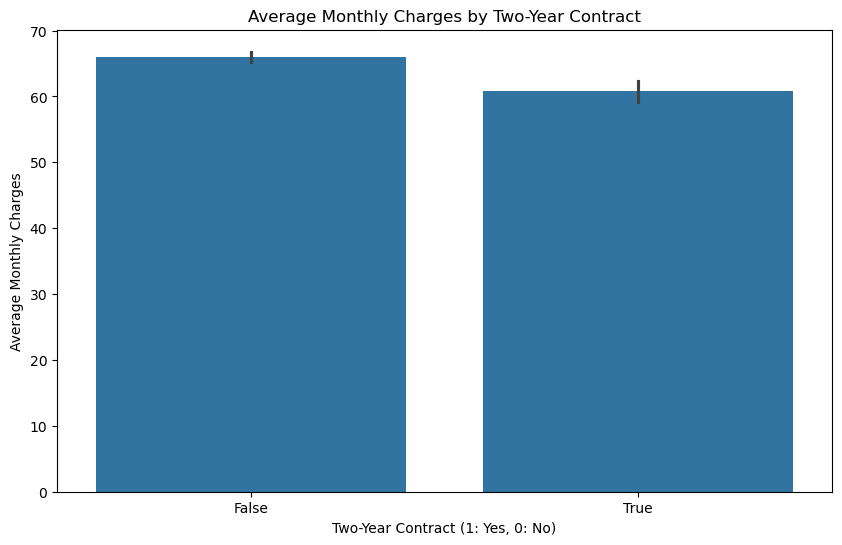

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Contract_One year', y='MonthlyCharges')
plt.title('Average Monthly Charges by One-Year Contract')
plt.xlabel('One-Year Contract (1: Yes, 0: No)')
plt.ylabel('Average Monthly Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Contract_Two year', y='MonthlyCharges')
plt.title('Average Monthly Charges by Two-Year Contract')
plt.xlabel('Two-Year Contract (1: Yes, 0: No)')
plt.ylabel('Average Monthly Charges')
plt.show()